In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
def getCSV(csv):
    dfl = pd.read_csv(csv)
    return dfl
    
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\ReligionLiteracy1911.csv')
print(df)
print(set(df['Religion'].tolist()))

                                        Statistic Label  Census Year  \
0                                            Population         1911   
1                                            Population         1911   
2                                            Population         1911   
3                                            Population         1911   
4                                            Population         1911   
...                                                 ...          ...   
4279  Percentage of population aged 9 years and over...         1911   
4280  Percentage of population aged 9 years and over...         1911   
4281  Percentage of population aged 9 years and over...         1911   
4282  Percentage of population aged 9 years and over...         1911   
4283  Percentage of population aged 9 years and over...         1911   

             Sex                 Religion  \
0     Both sexes            All Religions   
1     Both sexes            All Religions   


In [3]:
def translateName(value):
    if value == "Antrim (excluding Belfast City)":
        return "ANTRIM"
    elif value == "Belfast City (or County Borough), Belfast":
        return "BELFAST"
    elif value == "Londonderry":
        return "DERRY / LONDONDERRY"
    elif value == "DOWN (EXCLUDING BELFAST CITY)":
        return "DOWN"
    elif value == "Dublin City, Dublin":
        return "DUBLIN CITY"
    elif value == "Queens County":
        return "LAOIS"
    elif value == "Kings County":
        return "OFFALY"
    elif value == "Dublin County (excluding City Centre), Dublin":
        return "DUBLIN"
    elif value == "DUBLIN COUNTY":
        return "DUBLIN"
    else: 
        return value.upper()

df['County (Belfast & Dublin City separated)'] = df['County (Belfast & Dublin City separated)'].apply(translateName)
print(set(df['County (Belfast & Dublin City separated)'].tolist()))

{'MONAGHAN', 'WICKLOW', 'MEATH', 'DONEGAL', 'WATERFORD', 'BELFAST', 'CAVAN', 'LAOIS', 'TIPPERARY', 'GALWAY', 'ROSCOMMON', 'OFFALY', 'CARLOW', 'MAYO', 'DUBLIN CITY', 'DOWN (EXCLUDING BELFAST CITY)', 'FERMANAGH', 'DUBLIN', 'CORK', 'WEXFORD', 'CLARE', 'LOUTH', 'ARMAGH', 'LIMERICK', 'LEITRIM', 'SLIGO', 'KERRY', 'DERRY / LONDONDERRY', 'KILDARE', 'LONGFORD', 'ANTRIM', 'WESTMEATH', 'KILKENNY', 'TYRONE'}


In [4]:
ireland_shapefile = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\United_Ireland_Shape.shp')
print(ireland_shapefile)

    OBJECTID   CO_ID              ENGLISH            GAEILGE LOGAINM_ID  \
0          1   50000              DONEGAL       Dún na nGall     100013   
1          2  120000             LIMERICK          Luimneach     100022   
2          3   80000              KILDARE          Cill Dara     100007   
3          4  220000            WATERFORD        Port Láirge     100026   
4          5  260000               DUBLIN  Baile Átha Cliath     100002   
5          6  230000            WESTMEATH          An Iarmhí     100016   
6          7  170000             MONAGHAN         Muineachán     100025   
7          8  250000              WICKLOW      Cill Mhantáin     100008   
8          9   40000                 CORK           Corcaigh     100010   
9         10   70000                KERRY            Ciarraí     100005   
10        11  190000            ROSCOMMON         Ros Comáin     100027   
11        12  240000              WEXFORD        Loch Garman     100019   
12        13  130000     

In [5]:
filtered_df = df[(df['Statistic Label'] == "Population") & (df['Sex'] == "Both sexes")]
filtered_df['County (Belfast & Dublin City separated)'] = filtered_df['County (Belfast & Dublin City separated)'].apply(translateName)
print(set(filtered_df['County (Belfast & Dublin City separated)'].tolist()))

{'MONAGHAN', 'WICKLOW', 'MEATH', 'DONEGAL', 'WATERFORD', 'BELFAST', 'CAVAN', 'LAOIS', 'TIPPERARY', 'GALWAY', 'ROSCOMMON', 'OFFALY', 'CARLOW', 'MAYO', 'DUBLIN CITY', 'FERMANAGH', 'DUBLIN', 'CORK', 'WEXFORD', 'CLARE', 'LOUTH', 'ARMAGH', 'LIMERICK', 'LEITRIM', 'SLIGO', 'KERRY', 'DERRY / LONDONDERRY', 'KILDARE', 'DOWN', 'LONGFORD', 'ANTRIM', 'WESTMEATH', 'KILKENNY', 'TYRONE'}


C:\Users\Tom\AppData\Local\Temp\ipykernel_10304\847145001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['County (Belfast & Dublin City separated)'] = filtered_df['County (Belfast & Dublin City separated)'].apply(translateName)


In [6]:
catholic_df = filtered_df[filtered_df['Religion'] == 'Roman Catholics']

def updateAntrimDublin(update_df):
    antrim_index = update_df[update_df['County (Belfast & Dublin City separated)'] == 'ANTRIM'].index[0]
    belfast_index = update_df[update_df['County (Belfast & Dublin City separated)'] == 'BELFAST'].index[0]
    update_df.loc[antrim_index, 'VALUE'] += update_df.loc[belfast_index, 'VALUE']
    
    dubcounty_index = update_df[update_df['County (Belfast & Dublin City separated)'] == 'DUBLIN'].index[0]
    dubcity_index = update_df[update_df['County (Belfast & Dublin City separated)'] == 'DUBLIN CITY'].index[0]
    update_df.loc[dubcounty_index, 'VALUE'] += update_df.loc[dubcity_index, 'VALUE']
    return update_df
    
catholic_df = updateAntrimDublin(catholic_df)
print(catholic_df)

   Statistic Label  Census Year         Sex         Religion  \
34      Population         1911  Both sexes  Roman Catholics   
35      Population         1911  Both sexes  Roman Catholics   
36      Population         1911  Both sexes  Roman Catholics   
37      Population         1911  Both sexes  Roman Catholics   
38      Population         1911  Both sexes  Roman Catholics   
39      Population         1911  Both sexes  Roman Catholics   
40      Population         1911  Both sexes  Roman Catholics   
41      Population         1911  Both sexes  Roman Catholics   
42      Population         1911  Both sexes  Roman Catholics   
43      Population         1911  Both sexes  Roman Catholics   
44      Population         1911  Both sexes  Roman Catholics   
45      Population         1911  Both sexes  Roman Catholics   
46      Population         1911  Both sexes  Roman Catholics   
47      Population         1911  Both sexes  Roman Catholics   
48      Population         1911  Both se

In [7]:
pres_df = filtered_df[filtered_df['Religion'] == 'Presbyterians']
pres_df = updateAntrimDublin(pres_df)

methodist_df = filtered_df[filtered_df['Religion'] == 'Methodists']
methodist_df = updateAntrimDublin(methodist_df)

episcal_df = filtered_df[filtered_df['Religion'] == 'Protestant Episcopalians']
episcal_df = updateAntrimDublin(episcal_df)

denom_df = filtered_df[filtered_df['Religion'] == 'All Other Denominations']
denom_df = updateAntrimDublin(denom_df)

print(denom_df)

    Statistic Label  Census Year         Sex                 Religion  \
170      Population         1911  Both sexes  All Other Denominations   
171      Population         1911  Both sexes  All Other Denominations   
172      Population         1911  Both sexes  All Other Denominations   
173      Population         1911  Both sexes  All Other Denominations   
174      Population         1911  Both sexes  All Other Denominations   
175      Population         1911  Both sexes  All Other Denominations   
176      Population         1911  Both sexes  All Other Denominations   
177      Population         1911  Both sexes  All Other Denominations   
178      Population         1911  Both sexes  All Other Denominations   
179      Population         1911  Both sexes  All Other Denominations   
180      Population         1911  Both sexes  All Other Denominations   
181      Population         1911  Both sexes  All Other Denominations   
182      Population         1911  Both sexes  All O

In [8]:
condition = episcal_df['County (Belfast & Dublin City separated)'].str.contains('BELFAST')
episcal_df = episcal_df[~condition]

condition = episcal_df['County (Belfast & Dublin City separated)'].str.contains('DUBLIN CITY')
episcal_df = episcal_df[~condition]

In [9]:
merged_data = ireland_shapefile.merge(episcal_df, how='left', left_on='ENGLISH', right_on='County (Belfast & Dublin City separated)')
print(merged_data)

    OBJECTID   CO_ID              ENGLISH            GAEILGE LOGAINM_ID  \
0          1   50000              DONEGAL       Dún na nGall     100013   
1          2  120000             LIMERICK          Luimneach     100022   
2          3   80000              KILDARE          Cill Dara     100007   
3          4  220000            WATERFORD        Port Láirge     100026   
4          5  260000               DUBLIN  Baile Átha Cliath     100002   
5          6  230000            WESTMEATH          An Iarmhí     100016   
6          7  170000             MONAGHAN         Muineachán     100025   
7          8  250000              WICKLOW      Cill Mhantáin     100008   
8          9   40000                 CORK           Corcaigh     100010   
9         10   70000                KERRY            Ciarraí     100005   
10        11  190000            ROSCOMMON         Ros Comáin     100027   
11        12  240000              WEXFORD        Loch Garman     100019   
12        13  130000     

Image saved


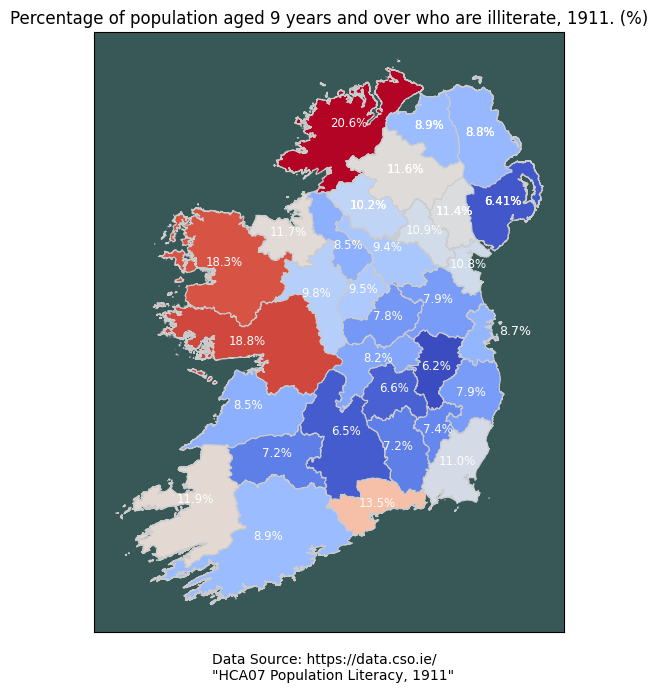

In [39]:
import numpy as np

def plotIreland(data, savefig):
    fig, ax = plt.subplots(1,1,figsize=(12,8))

    data['scaled_value'] = np.log1p(data['VALUE'])

    data.plot(column='scaled_value', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

    text_color = "#FEFEFE"
    font_size = 8.5
    for idx,row in data.iterrows():
        raw_pop_of_county = str(row['VALUE'])+"%"
        if row['ENGLISH'] == "DUBLIN":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+29000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color="#FFFFFF", 
                            fontsize=font_size+.5, 
                            ha='center')
        elif row['ENGLISH'] == "OFFALY":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']+9000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "CORK":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+14000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "WESTMEATH":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+4000, row['CENTROID_Y']-3000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "SLIGO":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']-5000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "ROSCOMMON":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+4000, row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "LEITRIM":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+7000, row['CENTROID_Y']-10000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        elif row['ENGLISH'] == "KERRY":
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X']+12000, row['CENTROID_Y']+3000),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')
        else:
            plt.annotate(text=str(raw_pop_of_county), 
                            xy=(row['CENTROID_X'], row['CENTROID_Y']),  # Assuming you have a 'centroid' column with Point geometries
                            color=text_color, 
                            fontsize=font_size, 
                            ha='center')  # Adjust ha and va as needed
    title_string = "Percentage of population aged 9 years and over who are illiterate, 1911. (%)"
    ax.set_title(title_string)

    ax.set_facecolor('#385757') 
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
    plt.text(0.25, -0.08, "Data Source: https://data.cso.ie/ \n\"HCA07 Population Literacy, 1911\"", ha='left', transform=ax.transAxes)


    if savefig == True:
        print("Image saved")
        plt.savefig("1911-Illiterate-AllIreland-Population.png")

    plt.show()
plotIreland(merged_data, True)

In [11]:
total_pop = df[(df['Statistic Label'] == 'Population') & (df['Sex'] == 'Both sexes') & (df['Religion'] == 'All Religions')]
total_pop = updateAntrimDublin(total_pop)
print(total_pop)

   Statistic Label  Census Year         Sex       Religion  \
0       Population         1911  Both sexes  All Religions   
1       Population         1911  Both sexes  All Religions   
2       Population         1911  Both sexes  All Religions   
3       Population         1911  Both sexes  All Religions   
4       Population         1911  Both sexes  All Religions   
5       Population         1911  Both sexes  All Religions   
6       Population         1911  Both sexes  All Religions   
7       Population         1911  Both sexes  All Religions   
8       Population         1911  Both sexes  All Religions   
9       Population         1911  Both sexes  All Religions   
10      Population         1911  Both sexes  All Religions   
11      Population         1911  Both sexes  All Religions   
12      Population         1911  Both sexes  All Religions   
13      Population         1911  Both sexes  All Religions   
14      Population         1911  Both sexes  All Religions   
15      

In [12]:
condition = total_pop['County (Belfast & Dublin City separated)'].str.contains('BELFAST')
total_pop = total_pop[~condition]

condition = total_pop['County (Belfast & Dublin City separated)'].str.contains('DUBLIN CITY')
total_pop = total_pop[~condition]

print(total_pop)

   Statistic Label  Census Year         Sex       Religion  \
0       Population         1911  Both sexes  All Religions   
1       Population         1911  Both sexes  All Religions   
3       Population         1911  Both sexes  All Religions   
4       Population         1911  Both sexes  All Religions   
5       Population         1911  Both sexes  All Religions   
6       Population         1911  Both sexes  All Religions   
8       Population         1911  Both sexes  All Religions   
9       Population         1911  Both sexes  All Religions   
11      Population         1911  Both sexes  All Religions   
12      Population         1911  Both sexes  All Religions   
13      Population         1911  Both sexes  All Religions   
14      Population         1911  Both sexes  All Religions   
15      Population         1911  Both sexes  All Religions   
16      Population         1911  Both sexes  All Religions   
17      Population         1911  Both sexes  All Religions   
18      

In [13]:
# down_row = pd.Series({'County (Belfast & Dublin City separated)': 'DOWN', 'VALUE': 204303.0})
# total_pop.loc[10] = down_row
# print(total_pop)
# total_pop['Catholic_pop'] = catholic_df['VALUE'].tolist()

In [24]:
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\ReligionLiteracy1911.csv')

In [25]:
illiterate_df = df[(df['Statistic Label'] == 'Percentage of population aged 9 years and over who are illiterate') & (df['Sex'] == 'Both sexes') & (df['Religion'] == 'All Religions')]
illiterate_df['County (Belfast & Dublin City separated)'] = illiterate_df['County (Belfast & Dublin City separated)'].apply(translateName)
illiterate_df = updateAntrimDublin(illiterate_df)

C:\Users\Tom\AppData\Local\Temp\ipykernel_10304\3892550008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illiterate_df['County (Belfast & Dublin City separated)'] = illiterate_df['County (Belfast & Dublin City separated)'].apply(translateName)


In [26]:
condition = illiterate_df['County (Belfast & Dublin City separated)'] == 'DOWN (EXCLUDING BELFAST CITY)'
new_value = 'DOWN'
illiterate_df.loc[condition, 'County (Belfast & Dublin City separated)'] = new_value
print(illiterate_df)

                                        Statistic Label  Census Year  \
3672  Percentage of population aged 9 years and over...         1911   
3673  Percentage of population aged 9 years and over...         1911   
3674  Percentage of population aged 9 years and over...         1911   
3675  Percentage of population aged 9 years and over...         1911   
3676  Percentage of population aged 9 years and over...         1911   
3677  Percentage of population aged 9 years and over...         1911   
3678  Percentage of population aged 9 years and over...         1911   
3679  Percentage of population aged 9 years and over...         1911   
3680  Percentage of population aged 9 years and over...         1911   
3681  Percentage of population aged 9 years and over...         1911   
3682  Percentage of population aged 9 years and over...         1911   
3683  Percentage of population aged 9 years and over...         1911   
3684  Percentage of population aged 9 years and over...         

In [27]:
merged_data = ireland_shapefile.merge(illiterate_df, how='left', left_on='ENGLISH', right_on='County (Belfast & Dublin City separated)')
print(merged_data)

    OBJECTID   CO_ID              ENGLISH            GAEILGE LOGAINM_ID  \
0          1   50000              DONEGAL       Dún na nGall     100013   
1          2  120000             LIMERICK          Luimneach     100022   
2          3   80000              KILDARE          Cill Dara     100007   
3          4  220000            WATERFORD        Port Láirge     100026   
4          5  260000               DUBLIN  Baile Átha Cliath     100002   
5          6  230000            WESTMEATH          An Iarmhí     100016   
6          7  170000             MONAGHAN         Muineachán     100025   
7          8  250000              WICKLOW      Cill Mhantáin     100008   
8          9   40000                 CORK           Corcaigh     100010   
9         10   70000                KERRY            Ciarraí     100005   
10        11  190000            ROSCOMMON         Ros Comáin     100027   
11        12  240000              WEXFORD        Loch Garman     100019   
12        13  130000     

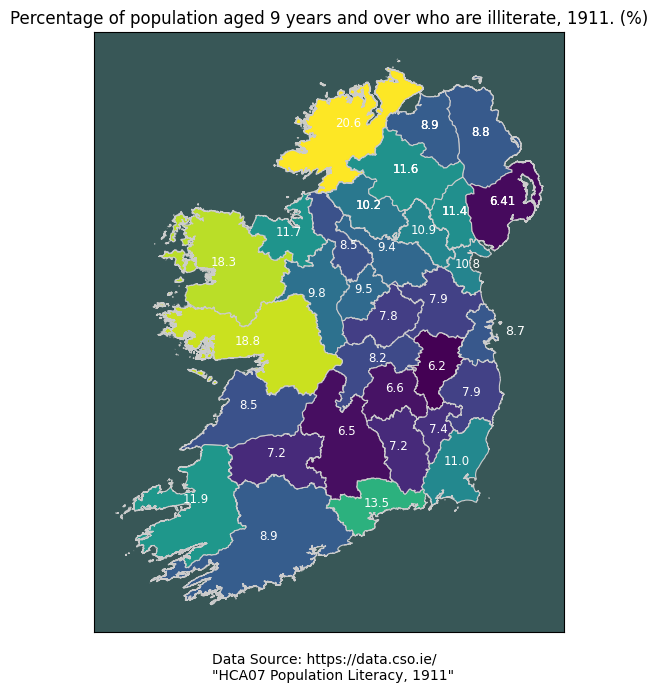

In [33]:
plotIreland(merged_data, False)